In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preparing the dataset

Use only the following columns:
- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [2]:
# Loading the dataset
URL = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
FILE = "./car_fuel_efficiency.csv"
df = pd.read_csv(FILE)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# Our dataframe with features
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[features]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

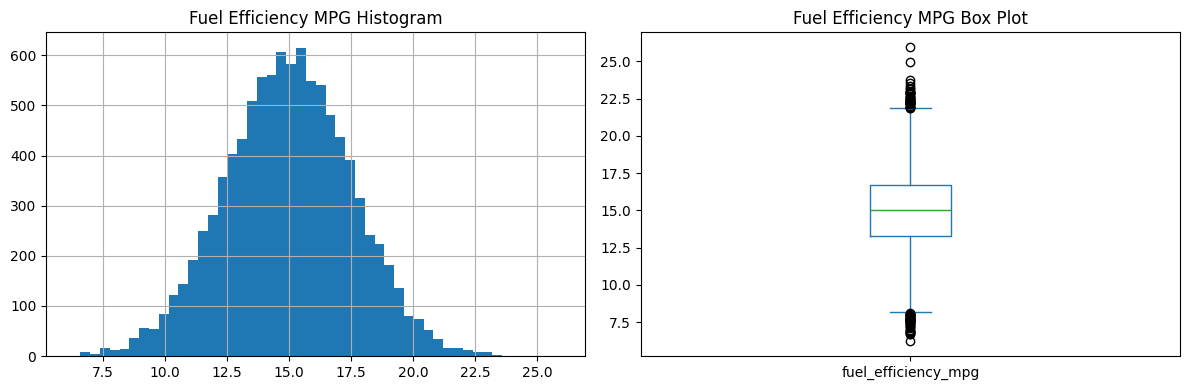

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['fuel_efficiency_mpg'].hist(bins=50)
plt.title('Fuel Efficiency MPG Histogram')

plt.subplot(1, 2, 2)
df['fuel_efficiency_mpg'].plot(kind='box')
plt.title('Fuel Efficiency MPG Box Plot')

plt.tight_layout()
plt.show()

In [5]:
df['fuel_efficiency_mpg'].mean() / df['fuel_efficiency_mpg'].median()

np.float64(0.9986143086730199)

## Question 1
There's one column with missing values. What is it?

In [6]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [7]:
df['horsepower'].median()

np.float64(149.0)

## Prepare and split the dataset

In [8]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n, n_train + n_val + n_test

(9704, 9704)

In [9]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

shuffled_df = df.iloc[idx]

In [10]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [11]:
df_train = shuffled_df.iloc[:n_train].copy()
df_val = shuffled_df.iloc[n_train:n_train+n_val].copy()
df_test = shuffled_df.iloc[n_train+n_val:].copy()

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [14]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704


In [15]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,180,112.0,2772.134410,2020,15.366341
1,260,138.0,3014.061530,2022,14.601182
2,140,181.0,3652.186151,2016,12.247032
3,270,105.0,2753.040847,2023,15.136400
4,170,224.0,4163.375137,2003,10.340419


In [16]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)</br>
Which option gives better RMSE?


In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X
     

In [18]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df_req, fillna_value):
    df_req = df_req.fillna(fillna_value)
    X = df_req.values
    return X

In [19]:

def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse_mean = round(rmse(y_val, y_pred),2)
print(f"RMSE when filling with mean: {rmse_mean}")

RMSE when filling with mean: 0.46


In [21]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rsme_zero = round(rmse(y_val, y_pred), 2)
print(f"RMSE when filling with zero: {rsme_zero}")
     


RMSE when filling with zero: 0.52


## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?</br>
If multiple options give the same best RMSE, select the smallest r.



In [28]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [23]:
def prepare_X2(df_req):
    df_num = df_req.copy()
    return df_num.fillna(0).values

In [24]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg2(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print(r, rmse_val)

0 0.5173782638832584
0.01 0.5171115525773323
1 0.5222348802092786
10 0.5229812979636602
100 0.5230636233819925


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.</br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.</br>
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [25]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X2(df_train) # fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmses.append(result)

0 0.5206531296332688
1 0.521338891285586
2 0.5228069974845856
3 0.5159516741113067
4 0.5109129460068478
5 0.528340646019822
6 0.5313910658149646
7 0.5090670387369987
8 0.5147399129423714
9 0.5131865908225833


In [26]:
np.std(rmses)

np.float64(0.006989446428872613)

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.</br>
What's the RMSE on the test dataset?


In [29]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train_combined = pd.concat([df_train, df_val], ignore_index=True)
    y_train_combined = np.concatenate([y_train, y_val])

    X_train_combined = prepare_X(df_train_combined, fillna_value=0)

    w_0, w = train_linear_regression_reg(X_train_combined, y_train_combined, r=0.001)
    
    X_test = prepare_X(df_test, fillna_value=0)
    
    y_pred_test = w_0 + X_test.dot(w)
    test_rmse = rmse(y_test, y_pred_test)
    
    print(f"Seed {s}: Test RMSE = {test_rmse:.4f}")
    rmses.append(test_rmse)

Seed 0: Test RMSE = 0.5226
Seed 1: Test RMSE = 0.5287
Seed 2: Test RMSE = 0.5105
Seed 3: Test RMSE = 0.5193
Seed 4: Test RMSE = 0.5322
Seed 5: Test RMSE = 0.5083
Seed 6: Test RMSE = 0.5260
Seed 7: Test RMSE = 0.5114
Seed 8: Test RMSE = 0.5074
Seed 9: Test RMSE = 0.5156


In [31]:
rmse_seed_9 = rmses[-1]
print(f"\nRMSE for seed 9: {rmse_seed_9:.4f}")
print(f"RMSE for seed 9 (rounded to 4 decimals): {round(rmse_seed_9, 4)}")


RMSE for seed 9: 0.5156
RMSE for seed 9 (rounded to 4 decimals): 0.5156
